# Quickstart

In [1]:
from typing import Union, Optional, List, Dict, Tuple, Any
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

import myforestplot as mfp

%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz

Last updated: Fri Sep 09 2022

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

graphviz: not installed

pandas      : 1.4.1
myforestplot: 0.1.7
numpy       : 1.21.5
matplotlib  : 3.5.3
statsmodels : 0.13.2

Watermark: 2.3.1



## Create pretty statsmodels result dataframe
titanic data can be downloaded from https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv.

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic = titanic[["survived", "pclass", "sex", "age", "embark_town"]]
titanic = titanic.dropna()

In [3]:
res = smf.logit("survived ~ sex + age + embark_town", data=titanic).fit()

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6


In [4]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                  0.2444
Time:                        02:00:51   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.2046      0.322      6.851      0.000       1.574       2.835
sex[T.male]                   -2.4760      0.191    -12.976      0.000      -2.850      -2.102
embark_town[T.Queenstown]     -1.8156      0.535     -3.393      0.001      -2.864      -0.767
embark_town[T.Southampton]    -1.0069      0.237     -4.251      0.000      -1.471      -0.543
age                           -0.0081      0.007     -1.233      0.217      -0.021       0.005
==============================================================================================
"""

After fitting, clean dataframe.

In [5]:
order = ["age", "sex", "embark_town"]
cont_cols = ["age"]
categorical = {"embark_town": ['Southampton', 'Cherbourg', 'Queenstown']}
df_sum = mfp.statsmodels_pretty_result_dataframe(titanic, res, 
                                                 order=order, 
                                                 cont_cols=cont_cols, 
                                                 fml=".3f", 
                                                 )

In [6]:
df_sum

,category,item,0,1,risk,nobs,risk_pretty
3,age,age,0.979300,1.004771,0.991954,NaN,"0.99 (0.98, 1.00)"
0,sex,male,0.057848,0.122213,0.084082,453.0,"0.08 (0.06, 0.12)"
4,sex,female,NaN,NaN,NaN,259.0,Ref.
1,embark_town,Queenstown,0.057027,0.464428,0.162742,28.0,"0.16 (0.06, 0.46)"
2,embark_town,Southampton,0.229654,0.581167,0.365332,554.0,"0.37 (0.23, 0.58)"
5,embark_town,Cherbourg,NaN,NaN,NaN,130.0,Ref.


The above type of dataframe structure is required. If you prepare dataframe like above, you do not need to use "mfp.statsmodels_pretty_result_dataframe".

## Create forestplot 

In [7]:
df = df_sum.copy()

In [8]:
df["nobs"] = (df["nobs"]
              .replace(np.nan, titanic.shape[0])
              .astype(int)
              )

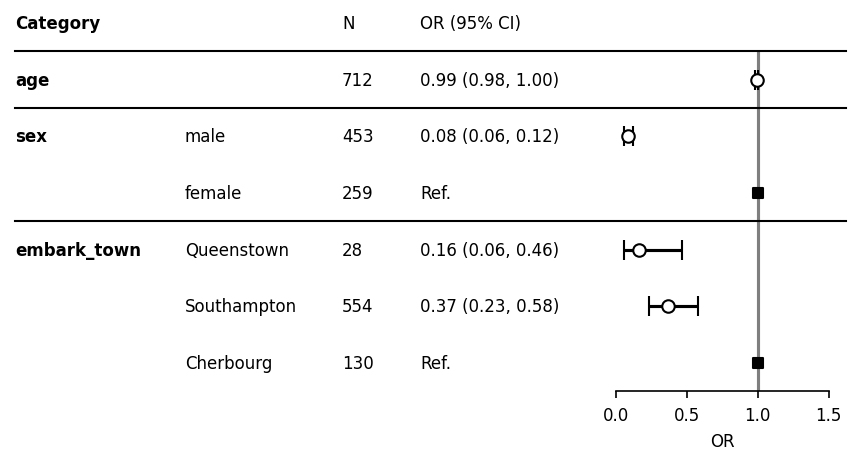

In [9]:
plt.rcParams["font.size"] = 8
fp = mfp.BaseForestPlot(ratio=(8,3), dpi=150, figsize=(7,3), df=df)
fp.errorbar(errorbar_kwds=None)
fp.ax2.set_xlim([0, 1.5])
fp.ax2.set_xticks([0, 0.5, 1, 1.5])
fp.ax2.set_xlabel("OR")
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)

fp.ax1.set_xlim([0.1, 1])
fp.embed_strings("category", 0.1, header="Category", 
                 duplicate_hide=True, 
                 text_kwds=dict(fontweight="bold"),
                 header_kwds=dict(fontweight="bold")
                 )
fp.embed_strings("item", 0.36, header="", replace={"age":""})
fp.embed_strings("nobs", 0.60, header="N")
fp.embed_strings("risk_pretty", 0.72, header="OR (95% CI)")
fp.horizontal_variable_separators()
plt.show()

Since this figure does not include all the participants rows, let's include that. 

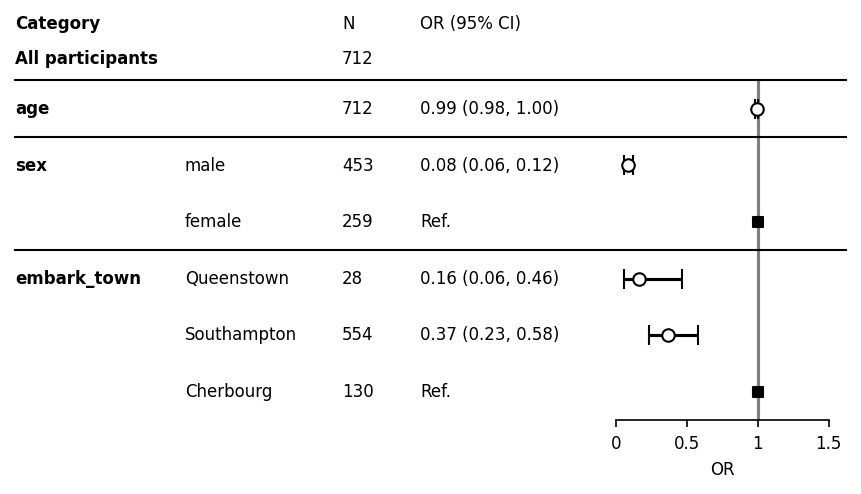

In [10]:
fontsize = 8
fp = mfp.BaseForestPlot(ratio=(8,3), dpi=150, figsize=(7,3), df=df)
fp.errorbar(errorbar_kwds=None)
fp.ax2.set_xlim([0, 1.5])
fp.ax2.set_xticks([0, 0.5, 1, 1.5])
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)
fp.ax2.set_xticks([0, 0.5, 1, 1.5])
fp.ax2.set_xticklabels([0, 0.5, 1, 1.5], fontsize=fontsize)
fp.ax2.set_xlabel("OR", fontsize=fontsize)

fp.ax1.set_xlim([0.1, 1])
y_header = 1.5
fp.embed_strings("category", 0.1, header="Category", fontsize=fontsize, 
                 duplicate_hide=True, 
                 text_kwds=dict(fontweight="bold"),
                 header_kwds=dict(fontweight="bold"),
                 y_header=1.5
                 )
fp.ax1.text(0.10, 0.8, "All participants", fontweight="bold", fontsize=fontsize)
fp.embed_strings("item", 0.36, header="", fontsize=fontsize, replace={"age":""},
                 y_header=1.5)
fp.embed_strings("nobs", 0.60, header="N", fontsize=fontsize,
                 y_header=1.5)
fp.ax1.text(0.60, 0.8, "712", fontsize=fontsize)
fp.embed_strings("risk_pretty", 0.72, header="OR (95% CI)", fontsize=fontsize,
                 y_header=1.5)
fp.horizontal_variable_separators()
plt.show()